# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [11]:
# Your code here. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import statsmodels.api as sm

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

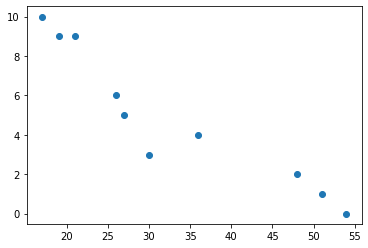

In [5]:
# Your code here.

plt.scatter(x=student_data['Age'], y=student_data['Tardies']);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [16]:
# Your response here. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
# Your response here.

student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [15]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here.

# add constant column
student_data = sm.add_constant(student_data)

# run OLS
reg_student_data = sm.OLS(student_data["Tardies"],
                 student_data[["const", "Age"]]).fit()
# in sm.OLS 'Y' as dependent variable goes ALWAYS first!

In [14]:
reg_student_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           5.57e-05
Time:                        18:03:38   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#use predict method to predict y-values of dependent variable (Tardies) for linear regression line

reg_student_data.predict(student_data[["const", "Age"]])

0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
dtype: float64

In [27]:
#to assign new predicted y-values to a new column clled 'reg' in student_data df

student_data = student_data.assign(reg = reg_student_data.predict(student_data[["const", "Age"]]))

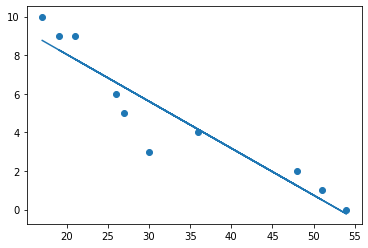

In [23]:
plt.scatter(student_data["Age"], student_data["Tardies"]);
plt.plot(student_data["Age"], student_data["reg"]);

Plot your regression model on your scatter plot.

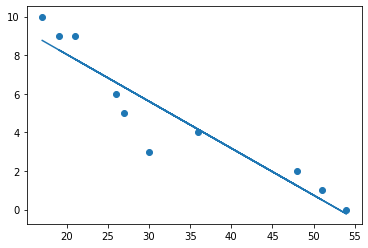

In [20]:
# Your code here.

x = student_data['Age']

y = student_data['Tardies']


#scatter plot with x and y, no linear regression line
plt.scatter(x,y); 

#NumPy polyfit() function returns a vector of coefficients (p), that minimizes the least squares error
#the '1' expresses the degree of the polynomial fit
z = np.polyfit(x, y, 1) 

#poly1d() calculates the actual y-axis data points. The call to plot() creates the trend line on the scatterplot
p = np.poly1d(z)

plb.plot(x, p(x))

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [29]:
# Import any libraries you may need & the data
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import statsmodels.api as sm

vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [35]:
print(vehicles["Year"].corr(vehicles["CO2 Emission Grams/Mile"]))
print(vehicles["Cylinders"].corr(vehicles["CO2 Emission Grams/Mile"]))
print(vehicles["Fuel Barrels/Year"].corr(vehicles["CO2 Emission Grams/Mile"]))
print(vehicles["Combined MPG"].corr(vehicles["CO2 Emission Grams/Mile"]))
print(vehicles["Fuel Cost/Year"].corr(vehicles["CO2 Emission Grams/Mile"]))

-0.22229960295054238
0.7523925537297486
0.9861886621428727
-0.9262290389336443
0.9308651512201844


In [30]:
# Your response here. 

vehicles = sm.add_constant(vehicles)

C:\Users\Lena\Miniconda3\envs\labs\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
vehicles_y = vehicles["CO2 Emission Grams/Mile"]
vehicles_x = vehicles[["const", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]

vehicles_lr = sm.OLS(vehicles_y, vehicles_x).fit()
vehicles_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 5.932e+05
Date:                     Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                             19:20:00   Log-Likelihood:            -1.5235e+05
No. Observations:                    35952   AIC:                         3.047e+05
Df Residuals:                        35948   BIC:                         3.047e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               131.6742      1.691     77.861      0.000     128.359     134.989
Fuel Barrels/Year    19.6955      0.059    331.484      0.000      19.579      19.812
Combined MPG         -3.1661      0.043    -73.626      0.000      -3.250      -3.082
Fuel Cost/Year        0.0317      0.000     70.466      0.000       0.031       0.033
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 